## Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output/data/merged_soccer_data.csv")
df.head()

,season_name,player_id,player_name,player_age,height_in,weight_lb,nationality,base_salary,guaranteed_compensation,team_id,team_name,team_short_name,team_abbreviation,primary_position,games,minutes_played,share_team_touches,attempted_passes,completed_passes,passing_percentage,xcompleted_passes,xpassing_percentage,passes_completed_over_expected_p100,passes_completed_over_expected,total_distance_yds,total_vertical_distance_yds,avg_distance_yds,avg_vertical_distance_yds,count_actions_Dribbling,count_actions_Fouling,count_actions_Interrupting,count_actions_Passing,count_actions_Receiving,count_actions_Shooting,goals_added_above_avg_Dribbling,goals_added_above_avg_Fouling,goals_added_above_avg_Interrupting,goals_added_above_avg_Passing,goals_added_above_avg_Receiving,goals_added_above_avg_Shooting,offensive_goals_added,goals_added_above_avg_Dribbling_90,goals_added_above_avg_Fouling_90,goals_added_above_avg_Interrupting_90,goals_added_above_avg_Passing_90,goals_added_above_avg_Receiving_90,goals_added_above_avg_Shooting_90,offensive_goals_added_90
0,2013,0Oq60APM6D,Jason Hernandez,30.0,71.0,172.0,USA,205000.0,208333.0,0KPqjA456v,San Jose Earthquakes,San Jose,SJE,CB,21,1817,0.064367,513,412,0.803119,422.5266,0.823639,-2.051170,-10.5225,12260.3289,5384.6294,23.899277,10.496354,86,22,389,515,334,0,0.1371,0.15161,-1.1739,-0.5978,-0.4063,-0.2050,-0.92039,0.006791,0.007510,-0.058146,-0.029610,-0.020125,-0.010154,-0.045589
1,2014,0Oq60APM6D,Jason Hernandez,31.0,71.0,172.0,USA,210000.0,213333.0,0KPqjA456v,San Jose Earthquakes,San Jose,SJE,CB,20,1868,0.071665,603,489,0.810945,468.2384,0.776515,3.442123,20.7560,14910.6652,7413.9083,24.727471,12.295039,111,31,356,603,418,0,-0.0374,-0.54960,0.0349,-0.0201,-0.3859,-0.2096,-1.20260,-0.001802,-0.026480,0.001681,-0.000968,-0.018593,-0.010099,-0.057941
2,2015,0Oq60APM6D,Jason Hernandez,32.0,71.0,172.0,USA,175000.0,185000.0,Vj58weDM8n,New York City FC,New York City,NYC,CB,26,2474,0.077219,953,770,0.807975,753.9209,0.791103,1.688248,16.0890,22966.6127,10295.8810,24.099279,10.803653,223,49,469,953,651,3,-0.0264,0.17760,-1.6048,-0.0460,-0.3216,-0.1946,-0.41100,-0.000960,0.006461,-0.058380,-0.001673,-0.011699,-0.007079,-0.014951
3,2016,0Oq60APM6D,Jason Hernandez,33.0,71.0,172.0,USA,200000.0,210000.0,Vj58weDM8n,New York City FC,New York City,NYC,CB,31,2463,0.073035,1194,994,0.832496,979.4032,0.820271,1.223124,14.6041,25698.6195,7639.7302,21.523132,6.398434,247,48,361,1194,819,0,-0.1575,-0.14280,0.0693,-0.1381,-0.5595,-0.2918,-1.28970,-0.005755,-0.005218,0.002532,-0.005046,-0.020445,-0.010663,-0.047127
4,2017,0Oq60APM6D,Jason Hernandez,34.0,71.0,172.0,USA,65004.0,65004.0,kRQabn8MKZ,Toronto FC,Toronto,TOR,CB,8,575,0.050937,185,153,0.827027,145.7144,0.787645,3.936432,7.2824,3782.9755,1614.4787,20.448516,8.726912,33,5,84,185,109,0,-0.0541,0.06090,-0.1101,-0.1102,-0.1446,-0.0742,-0.32220,-0.008468,0.009532,-0.017233,-0.017249,-0.022633,-0.011614,-0.050431


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   season_name                            5525 non-null   int64  
 1   player_id                              5525 non-null   object 
 2   player_name                            5525 non-null   object 
 3   player_age                             5525 non-null   float64
 4   height_in                              5525 non-null   float64
 5   weight_lb                              5525 non-null   float64
 6   nationality                            5525 non-null   object 
 7   base_salary                            5525 non-null   float64
 8   guaranteed_compensation                5525 non-null   float64
 9   team_id                                5525 non-null   object 
 10  team_name                              5525 non-null   object 
 11  team

## Correlations

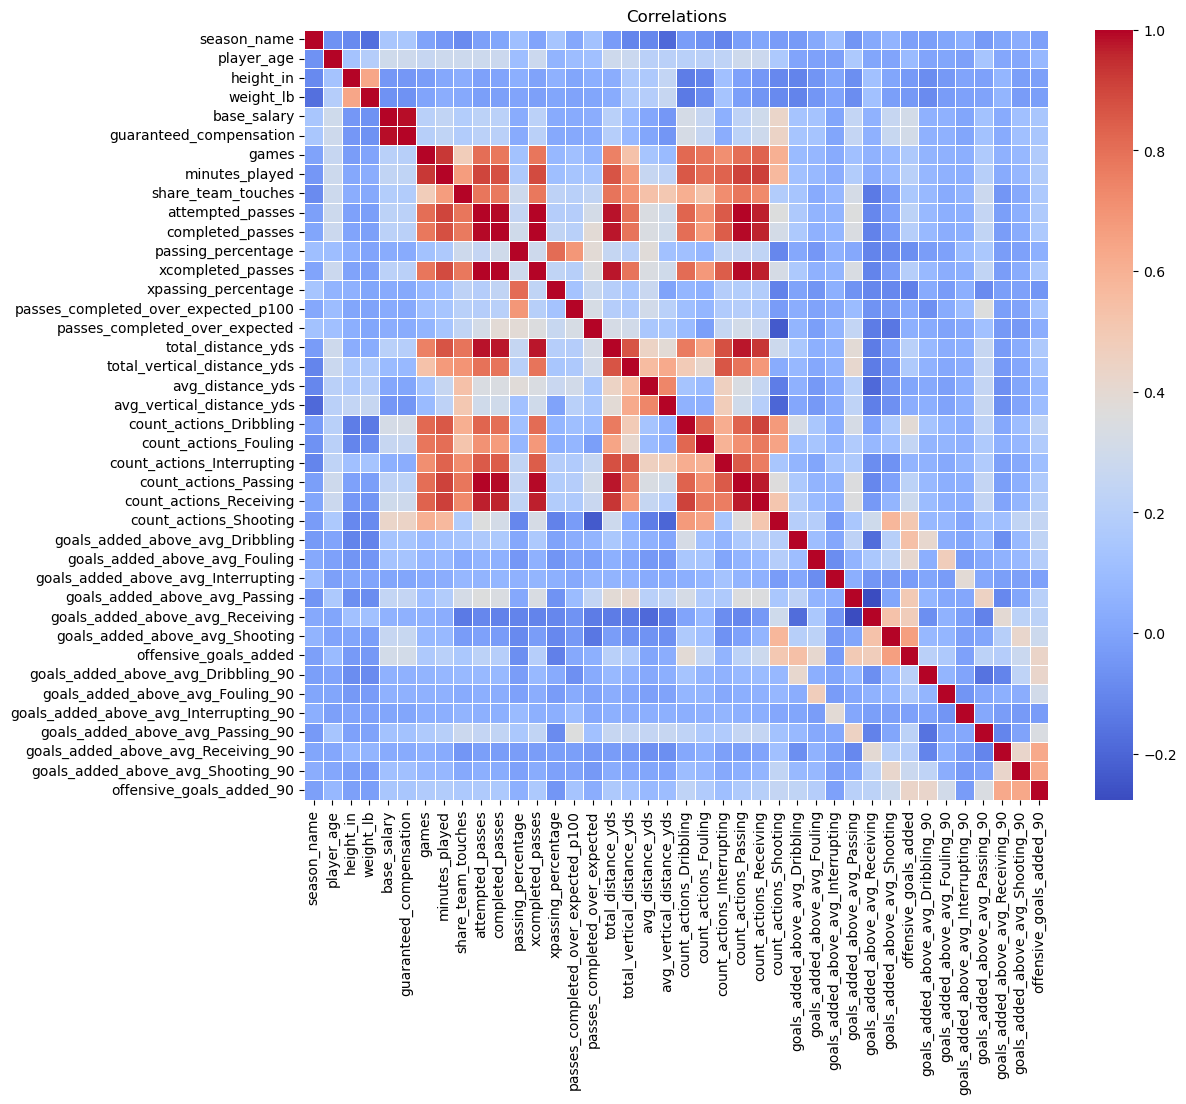

In [4]:
corrs = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
sns.heatmap(corrs, cmap='coolwarm', linewidths=.5)
plt.title("Correlations")

# Show the plot
plt.show()

In [5]:
# view correlations
abs(corrs["offensive_goals_added"]).sort_values(ascending=False)

offensive_goals_added                    1.000000
goals_added_above_avg_Shooting           0.662762
goals_added_above_avg_Dribbling          0.540439
count_actions_Shooting                   0.501832
goals_added_above_avg_Passing            0.494681
goals_added_above_avg_Receiving          0.471848
offensive_goals_added_90                 0.436526
goals_added_above_avg_Fouling            0.410233
count_actions_Dribbling                  0.388249
guaranteed_compensation                  0.312081
base_salary                              0.308303
count_actions_Receiving                  0.287028
goals_added_above_avg_Shooting_90        0.274872
count_actions_Fouling                    0.246008
goals_added_above_avg_Passing_90         0.220703
attempted_passes                         0.218350
count_actions_Passing                    0.218255
goals_added_above_avg_Dribbling_90       0.210374
total_distance_yds                       0.206768
minutes_played                           0.205110


## Feature Engineering for Modeling

Based on the correlation analysis, I am focusing on these features:

['guaranteed_compensation', 'minutes_played', 'share_team_touches',
           'attempted_passes', 'completed_passes', 'total_distance_yds', 'total_vertical_distance_yds',
           'xcompleted_passes', 'goals_added_above_avg_Dribbling',
           'goals_added_above_avg_Fouling', 'goals_added_above_avg_Interrupting',
           'goals_added_above_avg_Passing', 'goals_added_above_avg_Receiving',
           'goals_added_above_avg_Shooting']

The passing rate stats as well as offensive_goals_added and per90 rate stats can all be calculated directly from these columns, so this selection also decreases multi-collinearity.

*The Plan:*

For a given projection year, e.g. 2022, pull all feature data for that player from 3, 2, & 1 year prior, e.g. 2019-2021. A player making their debut in the target projection year will not be considered or included in this training set.

In [6]:
# Initialize an empty DataFrame to store aggregated data
dfp = pd.DataFrame()

# Iterate over years from 2014 to 2023
for year in range(2014, 2024):
    
    # Define the rolling window size
    rolling = 3
    
    # Calculate the minimum and maximum years based on the rolling window
    min_year = max(year - rolling, df.season_name.min())
    max_year = year - 1 
    
    # Generate a string indicating the range of years being considered
    yr_range = f"{min_year}-{max_year}"
    print(f"Getting {year} features from {yr_range}")

    # Initialize an empty DataFrame to store aggregated data for the current year
    data = pd.DataFrame()
    
    # Generate a list of years within the rolling window
    data_years = list(range(min_year, max_year + 1))
    
    # Counter to keep track of the suffix for column names
    counter = len(data_years)
    
    # Iterate over years within the rolling window
    for data_year in data_years:
        
        # Define columns to select from the original DataFrame
        idx = ['player_id', 'player_name']
        features = ['guaranteed_compensation', 'minutes_played', 'share_team_touches',
           'attempted_passes', 'completed_passes', 'total_distance_yds', 'total_vertical_distance_yds',
           'xcompleted_passes', 'goals_added_above_avg_Dribbling',
           'goals_added_above_avg_Fouling', 'goals_added_above_avg_Interrupting',
           'goals_added_above_avg_Passing', 'goals_added_above_avg_Receiving',
           'goals_added_above_avg_Shooting']

        # Get age and position from the latest year if it's the last iteration
        if counter == 1:
            extra = ["player_age", "primary_position"]
        else:
            extra = []

        # Select data for the current year from the original DataFrame
        x = df.loc[df.season_name == data_year, idx + extra + features]

        # Rename columns to include the year suffix
        for col in features:
            x.rename(columns={col: f"{col}_{counter}"}, inplace=True)

        # Merge data for the current year with the existing data
        if len(data) > 0:
            data = pd.merge(data, x, on=idx, how="outer") # outer merge here since players don't always play sequentially
        else:
            data = x

        # Decrement the counter
        counter -= 1

    # Select data specific to the current year
    if year != 2023:
        y = df.loc[df.season_name == year][["season_name", "player_id", "player_name", 'minutes_played', 'offensive_goals_added', 'offensive_goals_added_90']]
    else:
        # Handle the special case for the last year (2023)
        y = df.loc[df.season_name == 2022][["season_name", "player_id", "player_name", 'minutes_played', 'offensive_goals_added', 'offensive_goals_added_90']]
        # Change the season year to 2023
        y["season_name"] = 2023
        # Set target columns to NaN
        y[['minutes_played', 'offensive_goals_added', 'offensive_goals_added_90']] = np.nan
        
    # Merge data for the current year with the aggregated data
    new = pd.merge(y, data, on=idx)
    
    # Concatenate the newly created DataFrame with the main aggregated DataFrame
    dfp = pd.concat([dfp, new], ignore_index=True)

Getting 2014 features from 2013-2013
Getting 2015 features from 2013-2014
Getting 2016 features from 2013-2015
Getting 2017 features from 2014-2016
Getting 2018 features from 2015-2017
Getting 2019 features from 2016-2018
Getting 2020 features from 2017-2019
Getting 2021 features from 2018-2020
Getting 2022 features from 2019-2021
Getting 2023 features from 2020-2022


In [7]:
# Add a couple more features and fillna
dfp = dfp.loc[pd.notnull(dfp.minutes_played_1)].reset_index(drop=True) # drop guys who didn't play in the year right before predicting
dfp["played_two_years_ago"] = pd.notnull(dfp.minutes_played_2)
dfp["played_three_years_ago"] = pd.notnull(dfp.minutes_played_3)
dfp = dfp.fillna(0) # if didn't play, have 0 stats
dfp.loc[dfp.season_name == 2023, ['minutes_played', 'offensive_goals_added', 'offensive_goals_added_90']] = np.nan # 2023 targets are NULL
dfp = pd.get_dummies(dfp, columns=["primary_position"]) # one hot encode position
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   season_name                           4126 non-null   int64  
 1   player_id                             4126 non-null   object 
 2   player_name                           4126 non-null   object 
 3   minutes_played                        3419 non-null   float64
 4   offensive_goals_added                 3419 non-null   float64
 5   offensive_goals_added_90              3419 non-null   float64
 6   player_age                            4126 non-null   float64
 7   guaranteed_compensation_1             4126 non-null   float64
 8   minutes_played_1                      4126 non-null   float64
 9   share_team_touches_1                  4126 non-null   float64
 10  attempted_passes_1                    4126 non-null   float64
 11  completed_passes_

In [8]:
# get target data
targets = dfp.loc[dfp.season_name == 2023]
dfp = dfp.loc[dfp.season_name != 2023]

In [9]:
dfp.offensive_goals_added_90.describe()

count    3419.000000
mean       -0.011305
std         0.094152
min        -1.422900
25%        -0.048834
50%        -0.012340
75%         0.024605
max         2.175429
Name: offensive_goals_added_90, dtype: float64

## Write Outputs

In [10]:
dfp.to_csv("output/data/ml_soccer_data.csv", index=False)

In [11]:
targets.to_csv("output/data/ml_soccer_targets.csv", index=False)